### KNN Model 1

We drop those rows with null values for this model and to check for the accuracy rate

In [35]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
df_train = pd.read_csv('Train.csv') # read in training data file
df_test = pd.read_csv('Test.csv') # read in testing data file
#df_test.head()
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [37]:
#dropping those rows with no values
df_train = df_train.dropna()
df_test = df_test.dropna()
#df_test.head()
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [38]:
#deleting the unused column
del df_train['ID']
del df_test['ID']
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [39]:
#finding correlation to check if variables are highly correlated
df_train.corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.188769,-0.281772
Work_Experience,-0.188769,1.000000,-0.069123
Family_Size,-0.281772,-0.069123,1.000000


In [40]:
#mapping the values to numerical values by using dictionary
mydict = {
    "Male":1,
    "Female":0,
    "Yes": 1,
    "No": 0,
    "Artist": 0,
    "Doctor": 1,
    "Engineer":2,
    "Entertainment":3,
    "Executive":4,
    "Healthcare":5,
    "Homemaker":6,
    "Lawyer":7,
    "Marketing":8,
    "Low": 0,
    "Average": 1,
    "High": 2,
    "Cat_1" : 1,
    "Cat_2" : 2,
    "Cat_3" : 3,
    "Cat_4" : 4,
    "Cat_5" : 5,
    "Cat_6" : 6,
    "Cat_7" : 7, 
    "A":0,
    "B":1,
    "C":2,
    "D":3
}
#using loop to map all the respective values
for i in [0,1,3,4,6,8,9]:
    df_train.iloc[:, i] = df_train.iloc[:, i].map(mydict)
    df_test.iloc[:, i] = df_test.iloc[:, i].map(mydict)

In [41]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,0,4.0,4,3
2,0,1,67,1,2,1.0,0,1.0,6,1
3,1,1,67,1,7,0.0,2,2.0,6,1
5,1,1,56,0,0,0.0,1,2.0,6,2
6,1,0,32,1,5,1.0,0,3.0,6,2


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

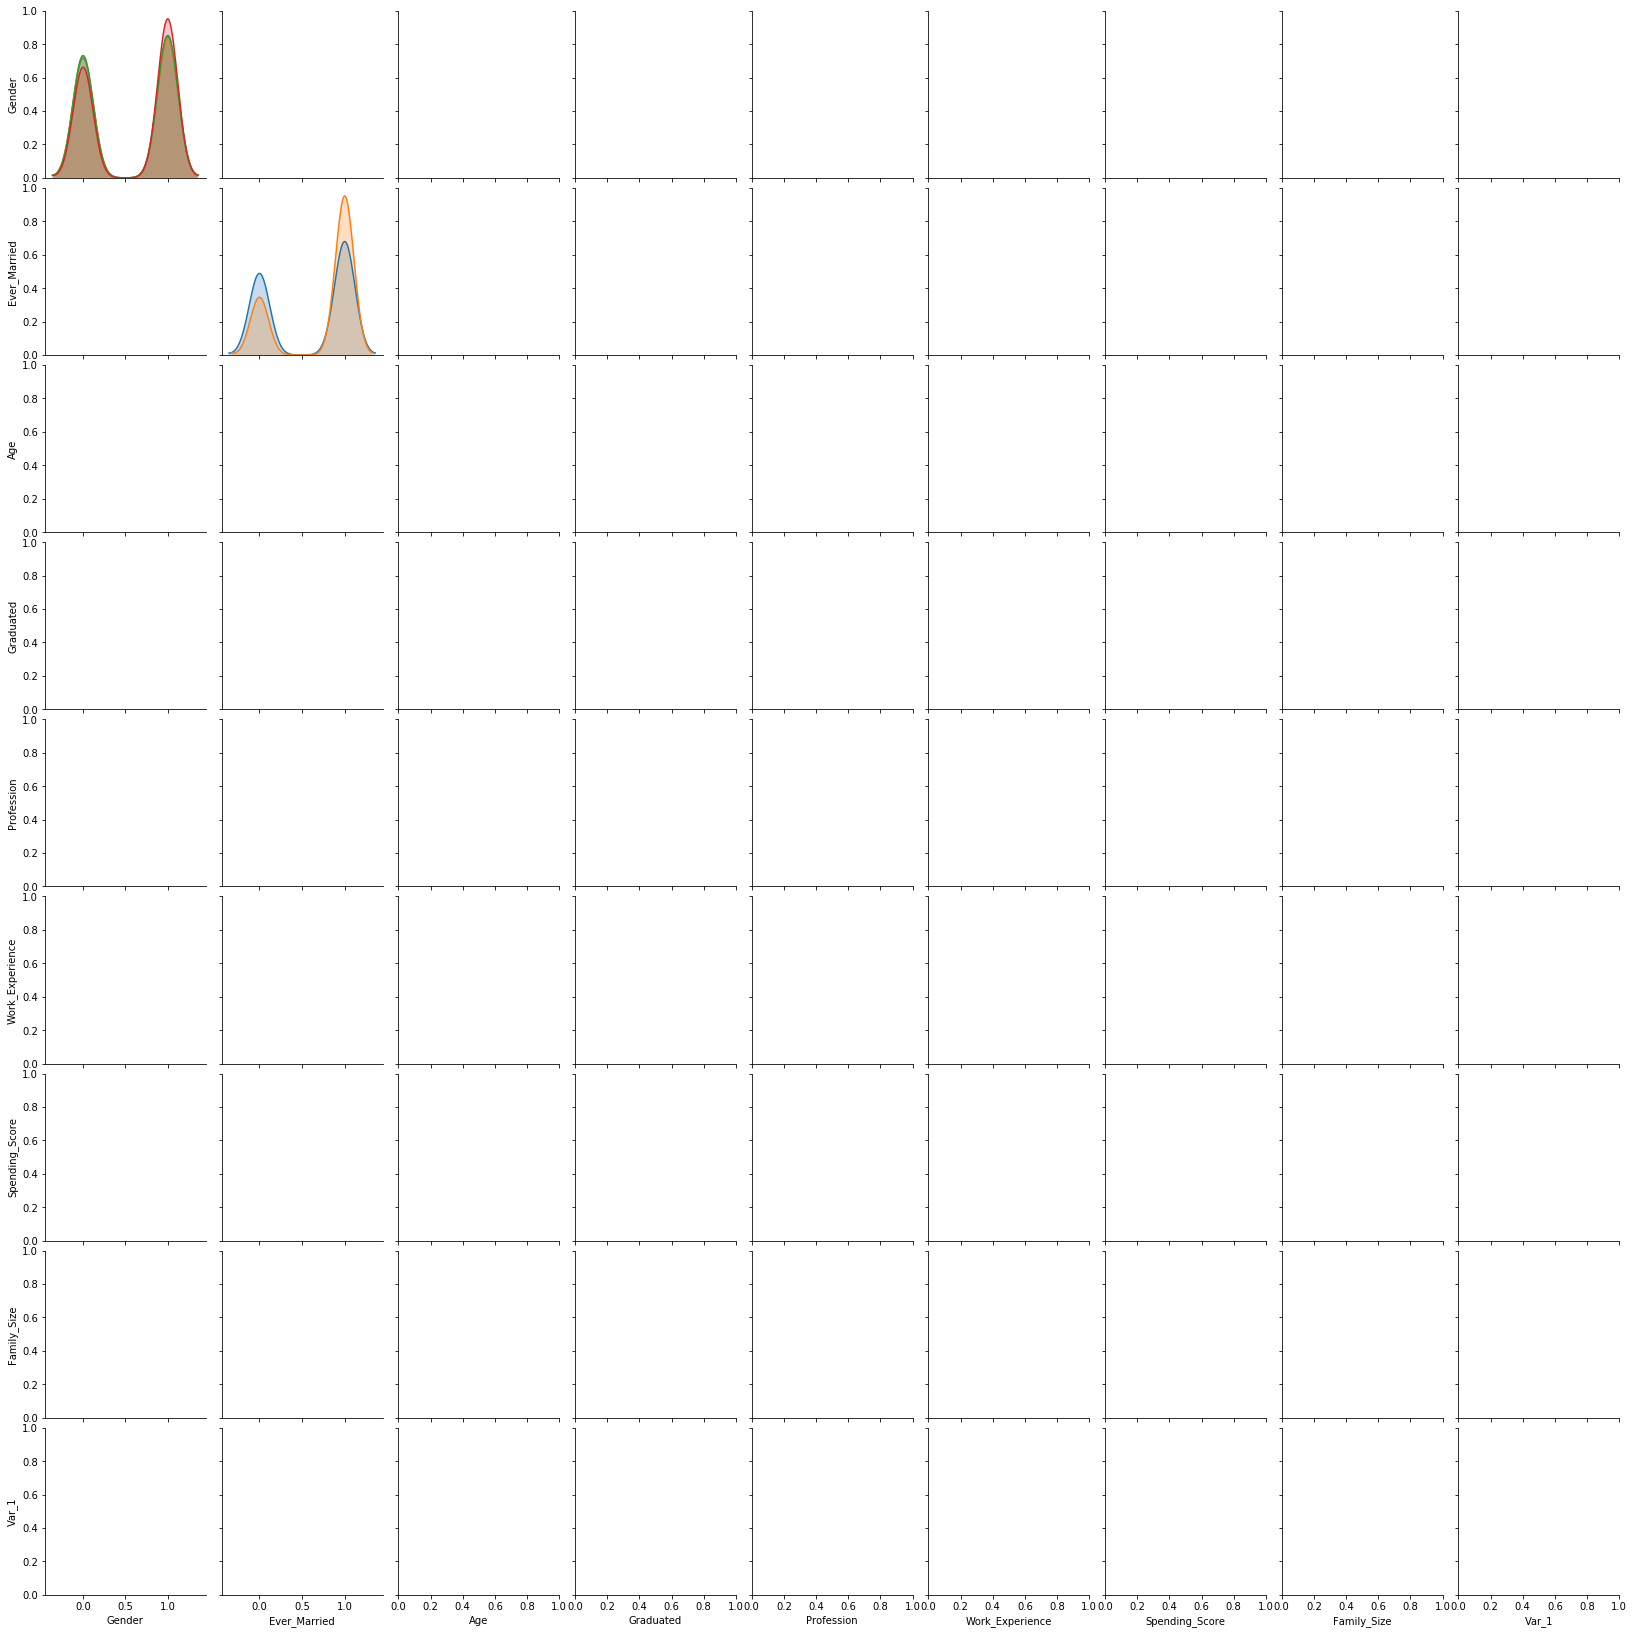

In [42]:
sb.pairplot (df_train, hue='Segmentation')
plt.show()

In [ ]:
#choising the features to be used for our model
x_train = df_train.iloc[:, 2:9]
y_train = df_train['Segmentation']
x_test = df_test.iloc[:, 2:9]
y_test = df_test['Segmentation']

In [ ]:
x_train

In [ ]:
#building the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)

In [ ]:
#predicting outcome
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
k_array = np.arange(1, 21, 2)
k_array

In [ ]:
#Testing with various K values in order to find a best accuracy rate for our model
%%time
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(x_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    print(k)
    print(ac)